In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

In [5]:
df = pd.read_csv('data/cgm_to_meal.csv')
no_meal_data = df.loc[df['meal'] == 0]
no_meal_data['cgm'] = no_meal_data['cgm'].fillna(0) 

     cgm  meal
0  118.0     0
1  122.0     0
2    0.0     0
3    0.0     0
4    0.0     0


/opt/anaconda3/envs/MC-final-project/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


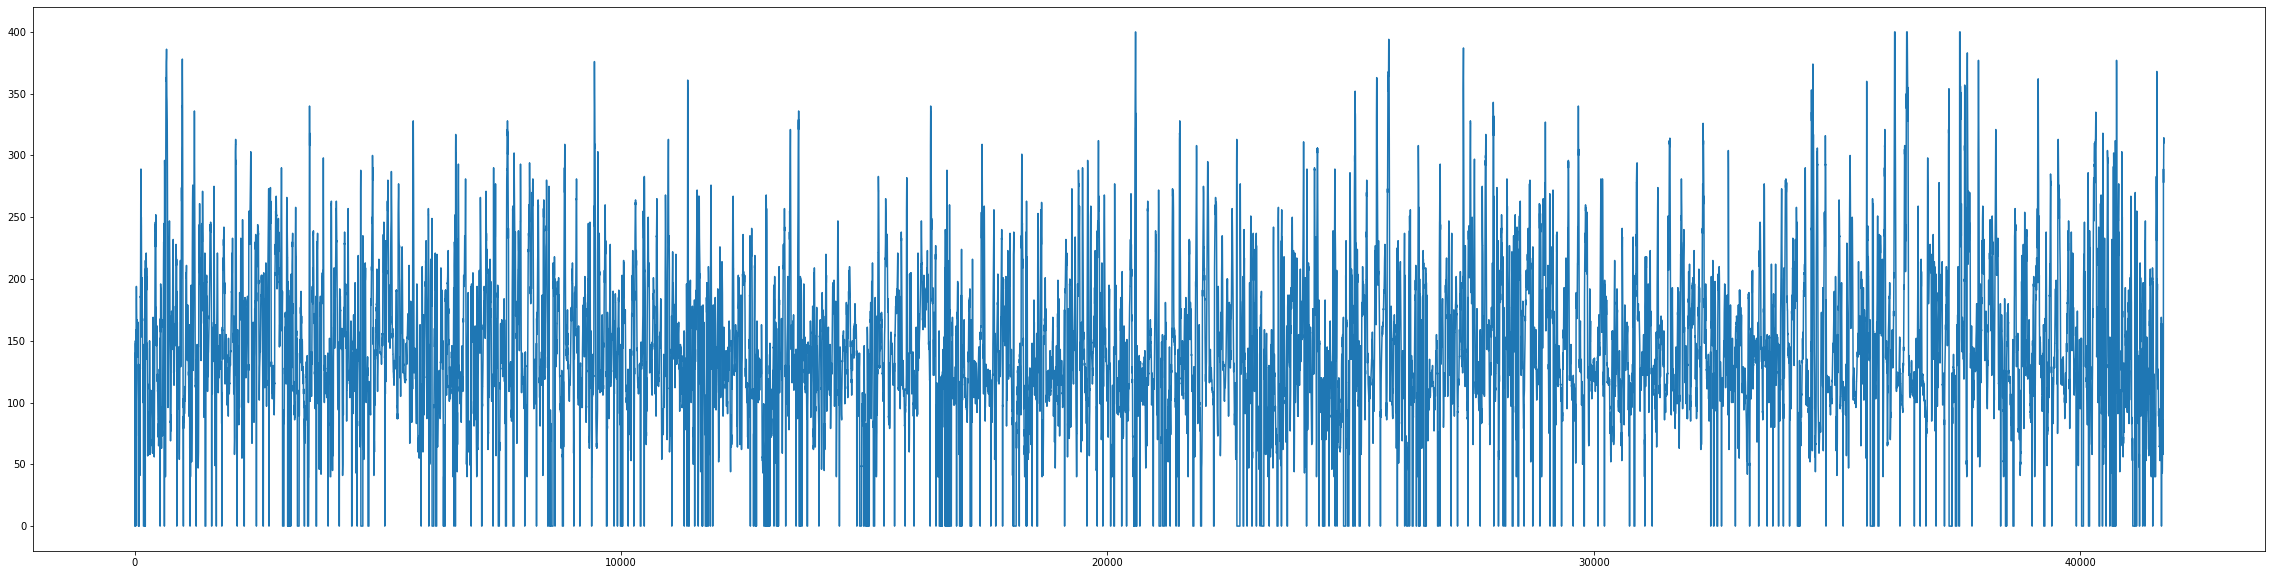

In [7]:
plt.figure(figsize=(40,10))
plt.plot(range(len(no_meal_data)),no_meal_data.cgm)

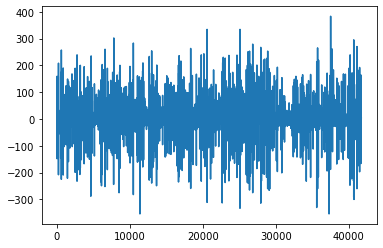

In [18]:
first_diff = no_meal_data.diff()
plt.plot(range(len(no_meal_data)),first_diff.cgm)

In [22]:
train_data = no_meal_data.cgm
test_data = df.cgm

In [31]:
my_order = (0,1,0)
my_seasonal_order = (1, 0, 1, 2)
# define model
model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)

/opt/anaconda3/envs/MC-final-project/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/envs/MC-final-project/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [32]:
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

Model Fitting Time: 5.780349254608154


In [33]:
print(model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                 cgm   No. Observations:                41721
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 2)   Log Likelihood             -187900.521
Date:                             Wed, 25 Nov 2020   AIC                         375807.042
Time:                                     11:33:47   BIC                         375832.958
Sample:                                          0   HQIC                        375815.229
                                           - 41721                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L2        0.1801      0.146      1.234      0.217      -0.106       0.466
ma.S.L2       -0.1643      

In [34]:
predictions = model_fit.forecast(len(test_data))
predictions = pd.Series(predictions, index=test_data.index)
residuals = test_data - predictions

/opt/anaconda3/envs/MC-final-project/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


Text(0, 0.5, 'Error')

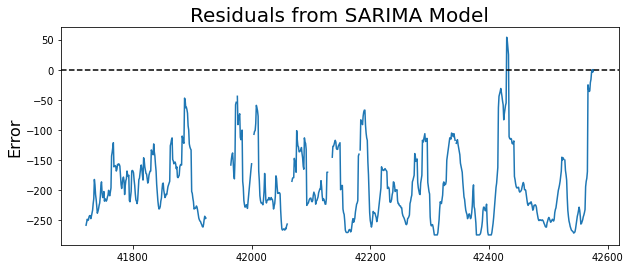

In [35]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

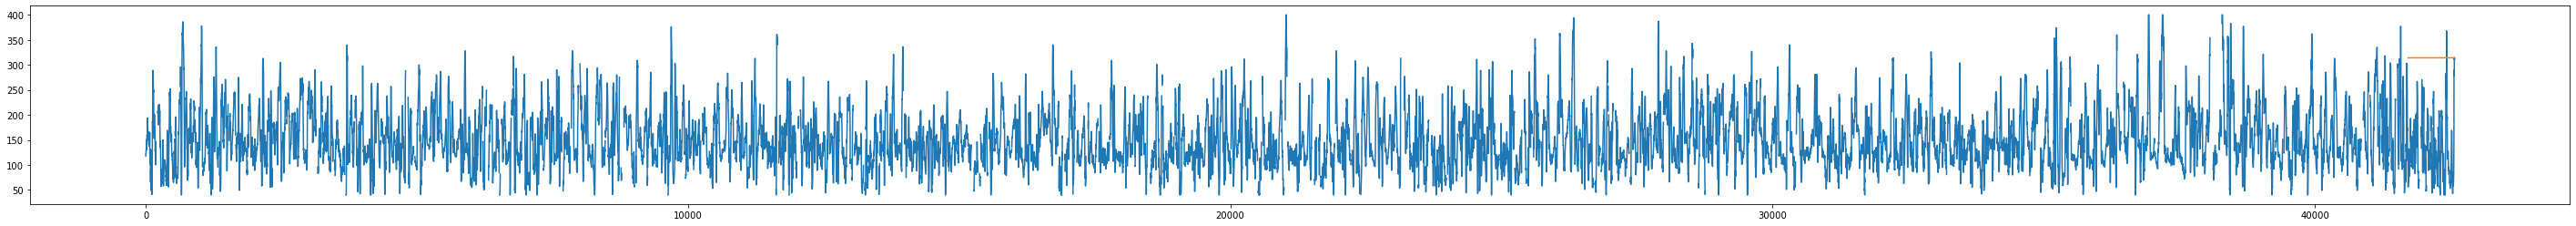

In [36]:
plt.figure(figsize=(50,4))

plt.plot(df.cgm)
plt.plot(predictions)
